The next supervised model we'll dive in is Kernelized support vector machines. Often referred to as SVMs, are an extension that allows for more complex models that aren't defined simply by hyperplanes in the input space. Like all other model, it can be use in both classification and regression task.

### Types of SVMs Algorithm

- Linear SVM: When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means that the data points can be classified into 2 classes by using a single straight line(if 2D).
- Non-Linear SVM: When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them. In most real-world applications we do not find linearly separable datapoints hence we use kernel trick to solve them.

### Important Terms

- Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.
- Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin. I will talk more about these two in the later section.

<img src="https://editor.analyticsvidhya.com/uploads/567891.png" alt="Alternative text" />

## How Does Support Vector Machine Work?

Let’s understand the working of SVM using an example. Suppose we have a dataset that has two classes (green and blue). We want to classify that the new data point as either blue or green.

<img src="https://editor.analyticsvidhya.com/uploads/467902.png" alt="Sample data" />

To classify these points, we can have many decision boundaries, but the question is which is the best and how do we find it? NOTE: Since we are plotting the data points in a 2-dimensional graph we call this decision boundary a straight line but if we have more dimensions, we call this decision boundary a “hyperplane”

<img src="https://editor.analyticsvidhya.com/uploads/492453.png" alt="Finding best plane" />

The best hyperplane is that plane that has the maximum distance from both the classes, and this is the main aim of SVM. This is done by finding different hyperplanes which classify the labels in the best way then it will choose the one which is farthest from the data points or the one which has a maximum margin.

<img src="https://editor.analyticsvidhya.com/uploads/729834.png" alt="Best plane split" />

During training, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes. Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes.

The distance between data points is measured by the Gaussian kernel:

$$k_{rbf}(x_1, x_2) = exp(-\gamma||x_1 - x_2||^2)$$

where $x_1$ and $x_2$ are data points, $||x_1 - x_2||$ is the Euclidean distance between the two points, and $\gamma$ is a parameter that controls the width of the Gaussian kernel.

Text(0, 0.5, 'Feature 1')

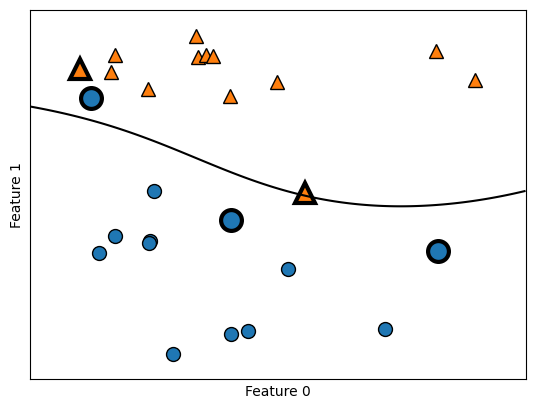

In [29]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mgl

X, y = mgl.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mgl.plots.plot_2d_separator(svm, X, eps=.5)
mgl.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mgl.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

So as we can see, the SVM model above returns a very smooth and non-linear decision boundary. This is achieved by the *kernel trick*, which transforms the input space into a higher dimensional space, where it becomes possible to separate the data using a linear decision boundary.